In [22]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection  import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import export_graphviz
import graphviz

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
matplotlib.rc('font',family = 'NanumGothicCoding')

In [4]:
df_raw = pd.read_csv("./data/HMEQ.csv", encoding = '949')
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [5]:
df_raw.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [6]:
df_raw['JOB'].fillna('Other', inplace = True)
df_raw.fillna(df_raw.mean(), inplace = True)

In [7]:
df_raw.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [8]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [9]:
df_raw_y = df_raw_dummy['BAD']
df_raw_x = df_raw_dummy.drop("BAD", axis = 1, inplace = False)
df_raw_x.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [10]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                               , test_size = 0.3, random_state = 1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))


train data X size : (2623, 18)
train data Y size : (2623,)
test data X size : (1125, 18)
test data Y size : (1125,)


In [11]:
svm_uncustomized = SVC(random_state = 1234)
svm_uncustomized.fit(df_train_x, df_train_y)

print('Accuracy on trainning set : {:.3f}'.format(svm_uncustomized.score(df_train_x, df_train_y)))
print('Accuracy on test set : {:.3f}'.format(svm_uncustomized.score(df_test_x, df_test_y)))

Accuracy on trainning set : 1.000
Accuracy on test set : 0.908


In [12]:
svm_uncustomized

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1234,
  shrinking=True, tol=0.001, verbose=False)

In [23]:
train_accuracy = [];test_accuracy=[]
para_c = [10 ** c for c in range(-2,2)]

for v_C in para_c:
    svm = SVC(random_state = 1234, 
                                 C = v_C)
    
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n['C'] = para_c
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n['TestAccuracy'] = test_accuracy
df_accuracy_n['Gap'] = np.array(train_accuracy)-np.array(test_accuracy)
df_accuracy_n.round(3)

,C,TrainAccuracy,TestAccuracy,Gap
0,0.01,0.908,0.908,0.001
1,0.10,0.908,0.908,0.001
2,1.00,1.000,0.908,0.092
3,10.00,1.000,0.908,0.092


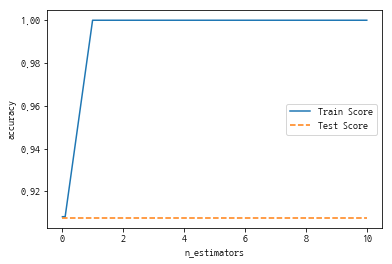

In [24]:
plt.plot(para_c, train_accuracy, linestyle = '-', label = 'Train Score')
plt.plot(para_c, test_accuracy, linestyle = '--', label = 'Test Score')
plt.xlabel('n_estimators'); plt.ylabel('accuracy')
plt.legend()

In [26]:
train_accuracy = [];test_accuracy=[]
para_gamma = [10 ** gamma for gamma in range(-2,2)]

for v_gamma in para_gamma:
    svm = SVC(random_state = 1234, 
                C = 0.1,
                gamma = v_gamma)
    
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))
    
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma['gamma'] = para_gamma
df_accuracy_gamma['TrainAccuracy'] = train_accuracy
df_accuracy_gamma['TestAccuracy'] = test_accuracy
df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,TestAccuracy
0,0.01,0.908,0.908
1,0.10,0.908,0.908
2,1.00,0.908,0.908
3,10.00,0.908,0.908


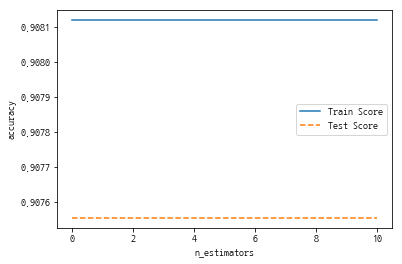

In [27]:
plt.plot(para_gamma, train_accuracy, linestyle = '-', label = 'Train Score')
plt.plot(para_gamma, test_accuracy, linestyle = '--', label = 'Test Score')
plt.xlabel('n_estimators'); plt.ylabel('accuracy')
plt.legend()

In [31]:
v_feature_names = df_train_x.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_names)
df_scaled.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,-1.548549,1.548549,-0.381873,-0.446497,1.207355,-0.574064,-0.131804,-0.189556
1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,-1.548549,1.548549,-0.381873,-0.446497,1.207355,-0.574064,-0.131804,-0.189556
2,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,-1.548549,1.548549,-0.381873,2.239654,-0.828257,-0.574064,-0.131804,-0.189556
3,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,-1.548549,1.548549,2.618672,-0.446497,-0.828257,-0.574064,-0.131804,-0.189556
4,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,-1.548549,1.548549,-0.381873,2.239654,-0.828257,-0.574064,-0.131804,-0.189556


In [34]:
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size=0.3, random_state=1234)

print('train data X size : {}'.format(df_scaled_train_x.shape))
print('test data X size : {}'.format(df_scaled_test_x.shape))

train data X size : (2623, 18)
test data X size : (1125, 18)


In [35]:
svm_scaled = SVC(random_state=1234)
svm_scaled.fit(df_scaled_train_x, df_train_y)

print('Accuracy on training set : {:.3f}'.format(svm_scaled.score(df_scaled_train_x,df_train_y)))
print('Accuracy on test set : {:.3f}'.format(svm_scaled.score(df_scaled_test_x,df_test_y)))

Accuracy on training set : 0.944
Accuracy on test set : 0.935


In [36]:
train_accuracy = [];test_accuracy=[]
para_c = [10 ** c for c in range(-2,2)]

for v_C in para_c:
    svm = SVC(random_state = 1234, C = v_C)
    
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n['C'] = para_c
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n['TestAccuracy'] = test_accuracy
df_accuracy_n['Gap'] = np.array(train_accuracy)-np.array(test_accuracy)
df_accuracy_n.round(3)

,C,TrainAccuracy,TestAccuracy,Gap
0,0.01,0.908,0.908,0.001
1,0.10,0.908,0.908,0.001
2,1.00,0.944,0.935,0.008
3,10.00,0.979,0.949,0.030


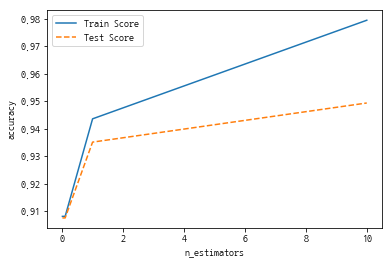

In [37]:
plt.plot(para_c, train_accuracy, linestyle = '-', label = 'Train Score')
plt.plot(para_c, test_accuracy, linestyle = '--', label = 'Test Score')
plt.xlabel('n_estimators'); plt.ylabel('accuracy')
plt.legend()

In [38]:
train_accuracy = [];test_accuracy=[]
para_gamma = [10 ** gamma for gamma in range(-2,2)]

for v_gamma in para_gamma:
    svm = SVC(random_state = 1234, 
                C = 1,
                gamma = v_gamma)
    
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))
    
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma['gamma'] = para_gamma
df_accuracy_gamma['TrainAccuracy'] = train_accuracy
df_accuracy_gamma['TestAccuracy'] = test_accuracy
df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,TestAccuracy
0,0.01,0.923,0.920
1,0.10,0.960,0.942
2,1.00,0.996,0.920
3,10.00,1.000,0.908


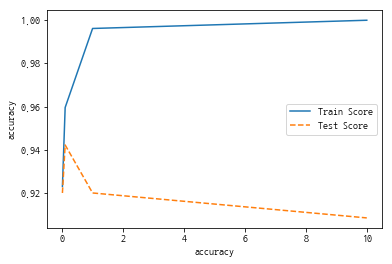

In [40]:
plt.plot(para_gamma, train_accuracy, linestyle = '-', label = 'Train Score')
plt.plot(para_gamma, test_accuracy, linestyle = '--', label = 'Test Score')
plt.xlabel('accuracy'); plt.ylabel('accuracy')
plt.legend()

In [43]:
svc_final = SVC(random_state = 1234, 
                                 gamma=0.1, C = 1)
svc_final.fit(df_scaled_train_x, df_train_y)
y_pred = svc_final.predict(df_scaled_test_x)

print('Accuacy on training set : {:.3f}'.format(svc_final.score(df_scaled_train_x, df_train_y)))
print('Accuacy on ttest set : {:.3f}'.format(svc_final.score(df_scaled_test_x, df_test_y)))
print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))


Accuacy on training set : 0.960
Accuacy on ttest set : 0.942
Confusion matrix : 
[[1021    0]
 [  65   39]]


In [46]:
estimator = SVC(random_state=1234)
param_grid = {'C':para_c,
             'gamma':para_gamma}

grid_rf = GridSearchCV(estimator, param_grid, scoring='accuracy', n_jobs=-1)
grid_rf.fit(df_scaled_train_x, df_train_y)
print('best estimator model: \n{}'.format(grid_rf.best_estimator_))
print('\n best parameter: \n{}'.format(grid_rf.best_params_))
print('\n best score: \n{}'.format(grid_rf.best_score_.round(3)))

best estimator model: 
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=1234, shrinking=True,
  tol=0.001, verbose=False)

 best parameter: 
{'C': 10, 'gamma': 0.1}

 best score: 
0.95
